### What are trained pipelines?

- Models that enable spaCy to predict linguistic attributes in context:
    - Part-of-speech tags
    - Syntactic dependencies
    - Named entities
- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions.


Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name.

Trained pipeline components have statistical models that enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Pipelines are trained on large datasets of labeled example texts.

They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

### Pipeline packages

$ python -m spacy download en_core_web_sm

In [1]:
import spacy

/home/max/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-22 11:25:30.632162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 11:25:30.828307: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-22 11:25:31.612100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_lo

In [2]:
nlp = spacy.load('en_core_web_sm')

- Binary weights
- Vocabulary
- Meta information
- Configuration file

spaCy provides a number of trained pipeline packages you can download using the spacy download command.
For example, the "en_core_web_sm" package is a small English pipeline that supports all core capabilities and is trained on web text.

The spacy.load method loads a pipeline package by name and returns an nlp object.

The package provides the binary weights that enable spaCy to make predictions.

It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.

### Predicting Part-of-speech Tags

Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

1. First, we load the small English pipeline and receive an nlp object.
2. Next, we're processing the text "She ate the pizza".
3. For each token in the doc, we can print the text and the .pos_ attribute, the predicted part-of-speech tag.

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an integer ID value.

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

In [3]:
doc = nlp("She ate the pizza")

In [6]:
for token in doc:
    print(token, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


### Predicting Syntactic Dependencies

In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The .dep_ attribute returns the predicted dependency label.

The .head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [7]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:

The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

The determiner "the", also known as an article, is attached to the noun "pizza".

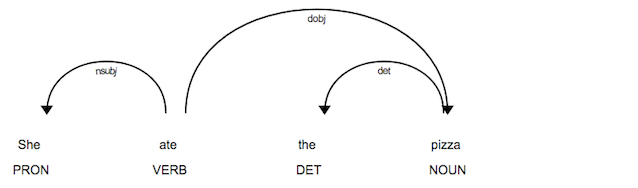

| Label | Description | Example |
|-|-|-|
| nsubj | nominal subject | She |
| dobj | direct object| pizza |
| det | determiner (article)| the


### Trained Pipelines

#### Predicting Named Entities

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The doc.ents property lets you access the named entities predicted by the named entity recognition model.

It returns an iterator of Span objects, so we can print the entity text and the entity label using the .label_ attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

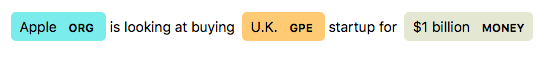

In [9]:
doc = nlp("Apple is looking at buying U.K. startup for 1$ billion")

In [10]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
1$ billion MONEY


#### Tip: the spacy.explain method

A quick tip: To get definitions for the most common tags and labels, you can use the spacy.explain helper function.

For example, "GPE" for geopolitical entity isn't exactly intuitive – but spacy.explain can tell you that it refers to countries, cities and states.

The same works for part-of-speech tags and dependency labels.

In [11]:
spacy.explain("GPE")

'Countries, cities, states'

In [12]:
spacy.explain("NNP")

'noun, proper singular'

In [13]:
spacy.explain("dobj")

'direct object'